<IPython.core.display.Javascript object>


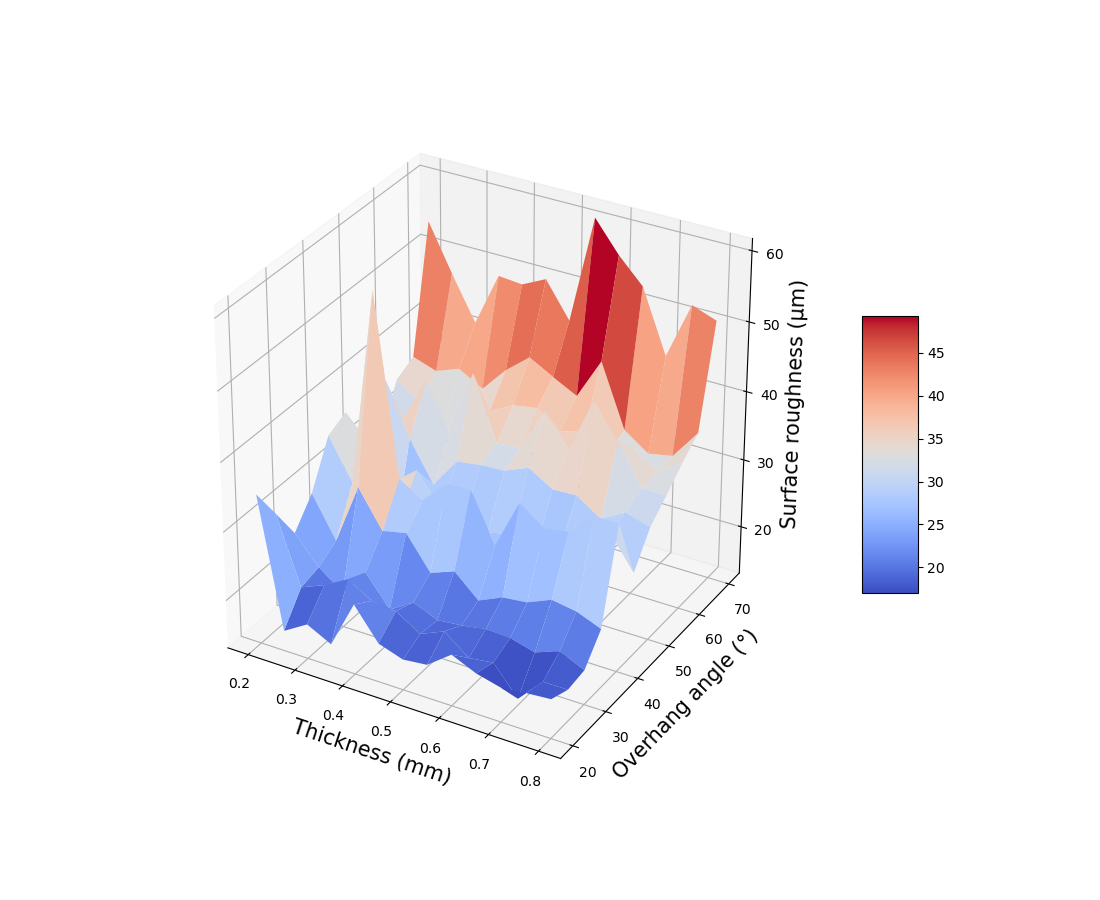

In [3]:
# import excel
%matplotlib notebook
import csv
import numpy as np
from numpy import sin, cos, pi  
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import skimage
from skimage import measure
from math import factorial as fac
from matplotlib.animation import FuncAnimation


def Choose(n,k): 
    return  fac(n)/ fac(k) / fac( n - k )

class nBezier(object):
    def __init__(self, points):
        self.points = np.array(points).astype(np.float32)

    def at(self, u,v):
        pt = 0 
        n=  self.points.shape[0]
        m = self.points.shape[1]
        for k in range(n):
            for l in range(m):
                pt +=  Choose(n-1,k) * (1-u)**(n-1-k) *u**k *Choose(m-1,l) * (1-v)**(m-1-l) * v**l*self.points[k,l]
        return pt
    
# Open the densities 
qual = []

with open('C:\\Users\\AdminSi\\Desktop\\CAGD\\PythonOcc\\BezierSurface\\Manufacturability.csv') as csvfile:
    readCSV = csv.reader(csvfile)
    for row in readCSV:
        for i in row:
            qual.append(float(i)) 

angles = 11 
radii = 13
Q = np.reshape(qual, (angles, radii))

x = np.arange(0.2, 0.85, 0.05)
y = np.arange(70, 15, -5)
X, Y = np.meshgrid(x, y)

fig = plt.figure( figsize=(11, 9))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Q,cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.4, aspect=5)

ax.set_xlabel('Thickness (mm)')
ax.set_ylabel('Overhang angle (°)')
ax.set_zlabel('Surface roughness (μm)')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.zaxis.label]):item.set_fontsize(15)
plt.show()

#anim.save('BezierEvol.mp4')